<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Unsupervised_ML_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-Means**

In [0]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

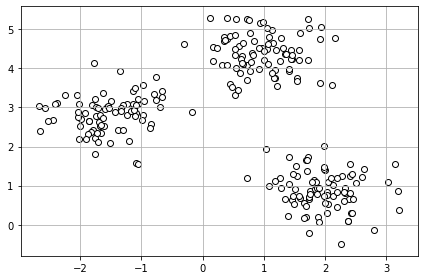

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black')

plt.grid()
plt.tight_layout()

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init = 'random', n_init = 10, max_iter = 300, tol=1e-04, random_state = 42)

y_km = km.fit_predict(X)

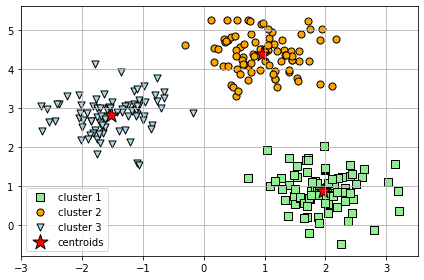

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

### **Quality of clustering**

In [12]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 5
yticks = []

for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper = cm.jet(float(i) / n_clusters)
  print(y_ax_upper)
  print(y_ax_lower)
#   plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

#   yticks.append((y_ax_lower + y_ax_upper) / 2.)
#   y_ax_lower += len(c_silhouette_vals)

# silhouette_avg = np.mean(silhouette_vals)
# plt.axvline(silhouette_avg, color="red", linestyle="--") 

# plt.yticks(yticks, cluster_labels + 1)
# plt.ylabel('Cluster')
# plt.xlabel('Silhouette coefficient')

# plt.tight_layout()

(0.0, 0.0, 0.5, 1.0)
0
(0.0, 0.8333333333333334, 1.0, 1.0)
0
(1.0, 0.9012345679012348, 0.0, 1.0)
0
